# Lazyfit model catalog for 1-dimensional models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lazyfit

# Lorentzian

Fit a lorentzian distribution with a constant background

$f(x) = \frac{A}{1+(x-x0)^2/(FWHM/2)^2} + B$

In [2]:
# data parameters
A = 500 # amplitude
x0 = 1 # peak location
B = 100 # background 
FWHM = 2 # FWHM

# generat data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.lorentz.f(x, A, x0, FWHM, B)
y_noise = np.random.poisson(lam=y)

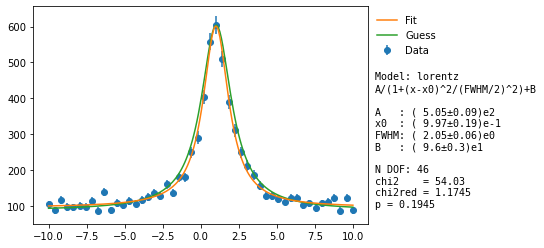

In [3]:
# fit
fit_lorentz = lazyfit.fit('lorentz', x, y_noise, dy=np.sqrt(y_noise))
fit_lorentz.plot(N=200, plot_guess = True);

# Gaussian

In [4]:
# data parameters
A = 500 # amplitude
x0 = 1 # peak location
s = 1 # standard deviation
B = 100 # background

# generate data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.gaussian.f(x, A, x0, s, B)
y_noise = np.random.poisson(lam=y)

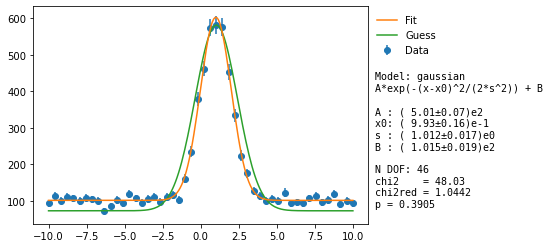

In [5]:
fit_gauss = lazyfit.fit('gaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gauss.plot(N=200, plot_guess = True);

# Normalised gaussian

This is the same as the Gaussian above except the peak amplitude is replaced by the area below the Gaussian

In [6]:
# data parameters
area = 1000 # area
x0 = 1 # peak location
s = 1 # standard deviation

# generate data
x = np.linspace(-10, 10, 50)
y = lazyfit.models.normgaussian.f(x, area, x0, s)
y_noise = np.random.poisson(lam=y)

C:\Dropbox\Programming\Python\lazyfit\wrapper.py:106: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum((self.y - self.predict(self.x)) ** 2 / self.dy ** 2)


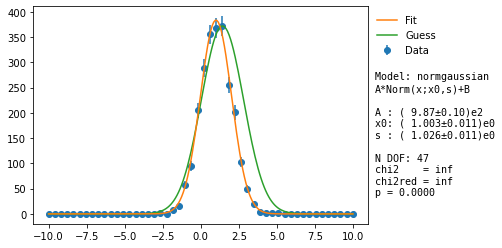

In [7]:
fit_gauss = lazyfit.fit('normgaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_gauss.plot(N=200, plot_guess = True);

# Voigt

In [8]:
# data parameters
A = 1000 # peak amplitude
x0 = 0 # peak location
L = 1 # lorentzian FWHM
G = 2 # Gaussian FWHM
B = 100 # background

# generate data
x = np.linspace(-5 ,5 , 100)
y = lazyfit.models.voigt.f(x, A, x0, L, G, B )
y_noise = np.random.poisson(lam=y)

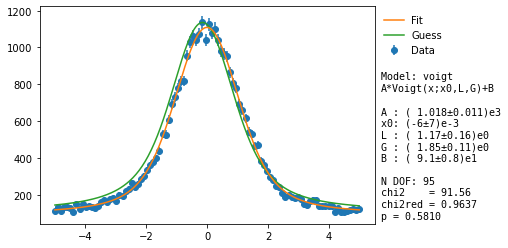

In [9]:
fit_voigt = lazyfit.fit('voigt', x, y_noise, dy=np.sqrt(y_noise))
fit_voigt.plot(N=200, plot_guess = True);

Calculate the total FWHM:

In [10]:
lazyfit.utility.get_voigt_FWHM(fit_voigt.params_dict['G'], fit_voigt.params_dict['L'] )

2.552437923002708

# Exponential decay

In [11]:
# test data parameters
A = 2000 # amplitude at x=0
gamma = 1 # decay rate
B = 10 # background

# generate test data
x = np.linspace(0, 10, 500)
y = lazyfit.models.exp.f(x, A, gamma, B)
y_noise = np.random.poisson(lam=y)

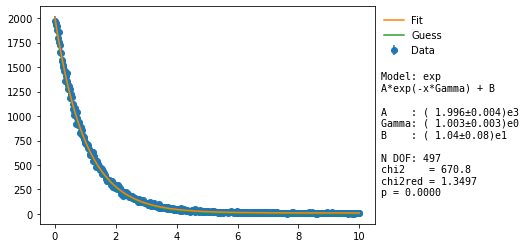

In [12]:
fit_exp = lazyfit.fit('exp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_exp.plot(plot_guess = True)

Here it can be usefull to enable the logarithmic y axis and to plot the residuals

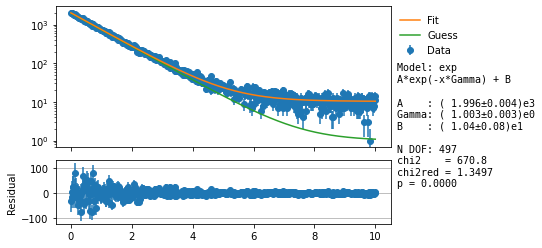

In [13]:
fig = fit_exp.plot(plot_guess = True, logy = True, plot_residuals=True)

# Biexponential decay

In [14]:
# test data parameters
A1 = 2000 # amplitude at t=0, first exponential
gamma1 = 1 # decay rate, first exponential
A2 = 1000 # amplitude at t=0, second exponential
gamma2 = 0.1 # decay rate, second exponential
B = 0 # background

# generate test data
x = np.linspace(0,10,500)
y = lazyfit.models.biexp.f(x, A1, gamma1, A2, gamma2, B)
y_noise = np.random.poisson(lam=y)

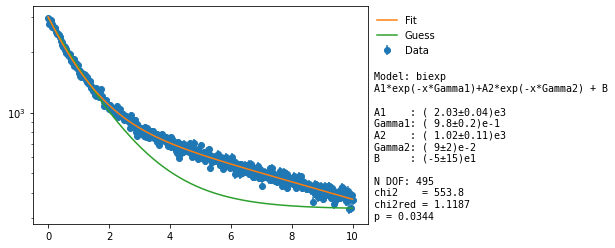

In [15]:
fit_biexp = lazyfit.fit('biexp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_biexp.plot(plot_guess = True, logy=True)

# Convolved exponential

Single exponential decay convolved with Gaussian response

In [16]:
# test data parameters
A = 2000 # amplitude at t=0
gamma = 1 # decay rate
B = 10 # background
x0 = 0 # start time of decay
s = 0.2 # instrument response standard deviation

# generate test data
x = np.linspace(-2,6,500)
y = lazyfit.models.convexp.f(x, A, gamma, B, x0, s)
y_noise = np.random.poisson(lam=y)

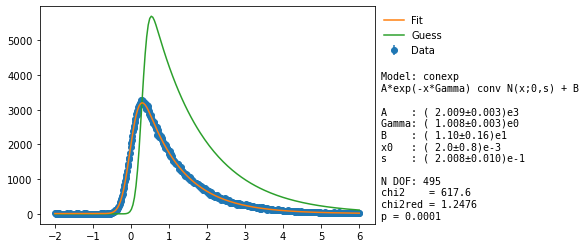

In [17]:
fit_convexp = lazyfit.fit('convexp', x, y_noise, dy = np.sqrt(y_noise))
fig = fit_convexp.plot(plot_guess = True)

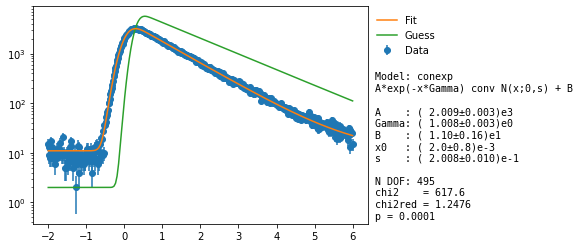

In [18]:
fig = fit_convexp.plot(plot_guess = True, logy = True)

# Sine

In [19]:
# test data parameters
A = 0.5 # amplitude
f = np.random.uniform(2, 4) # positive, real frequency
phi = np.random.uniform(0, 2*np.pi) # phase, between 0 and 2pi
B = np.random.uniform(-3, 3) # constant offset

# generate test data
x = np.linspace(0,2,100)
y = lazyfit.models.sin.f(x, A, f, phi, B)
y_noise = y + np.random.normal(scale=0.1, size=x.size)

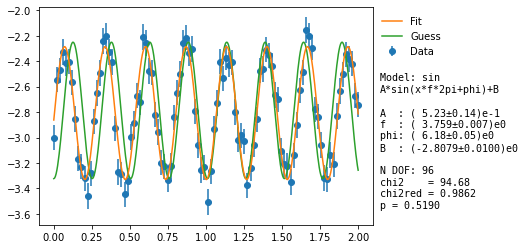

In [20]:
fit_sin = lazyfit.fit('sin',x,y_noise, dy=0.1)
fig = fit_sin.plot(N=400, plot_guess=True)

# Ramsey

In [21]:
# test data parameters
A = 5 # amplitude
f = 2.35 # positive, real frequency
phi = 0 # phase
B = 0 # constant offset
T2s = 5 # 1/e time of envelope
alpha = 2 # exponential exponent of envelope

# generate test data
x = np.linspace(0, 10, 200)
y = lazyfit.models.ramsey.f(x, A, f, phi, B, T2s, alpha)
y_noise = y + np.random.normal(scale=0.2, size=x.size)

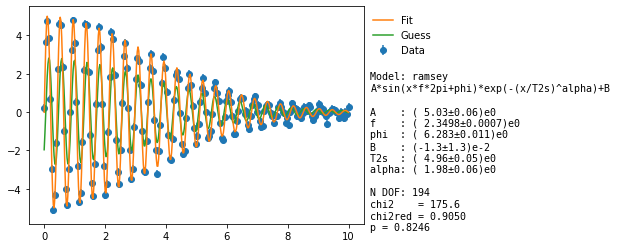

In [22]:
fit_ramsey = lazyfit.fit('ramsey', x, y_noise, dy=0.2)
fig = fit_ramsey.plot(N=400, plot_guess=True)

# Rabi

In [23]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x_pi = 0.5e-7 # pi pulse power

# generate test data
x = np.linspace(0, 2e-7, 30)
y = lazyfit.models.rabi.f(x, A, x_pi, B)
y_noise = np.random.poisson(lam=y)

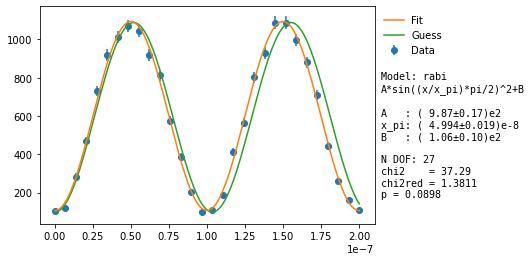

In [24]:
fit_rabi = lazyfit.fit('rabi', x, y_noise, dy=np.sqrt(y_noise))
fit_rabi.plot(N=200, plot_guess=True);

# Two-level saturation

In [25]:
# test data parameters
Psat = 0.2e-5 # saturation power
Imax = 1000 # intensity at infinite power

# generate test data
x = np.linspace(0, 5*Psat, 30)
y = lazyfit.models.twolvlsat.f(x, Psat, Imax)
y_noise = np.random.poisson(lam=y)

C:\Dropbox\Programming\Python\lazyfit\wrapper.py:106: RuntimeWarning: invalid value encountered in true_divide
  return np.sum((self.y - self.predict(self.x)) ** 2 / self.dy ** 2)


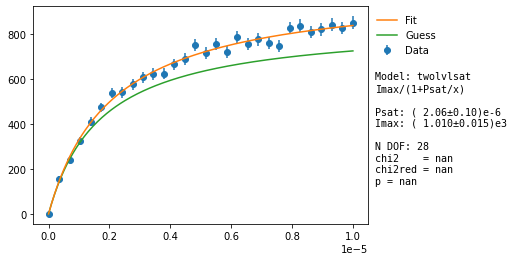

In [26]:
fit_twolvlsat = lazyfit.fit('twolvlsat', x, y_noise, dy=np.sqrt(y_noise))
fit_twolvlsat.plot(N=200, plot_guess=True);

# Linear

In [27]:
# test data parameters
A = 5 # linear slope
B = 1 # y-intercept

# generate test data
x = np.linspace(-2,5,20)
y = lazyfit.models.lin.f(x, A, B)
y_noise = y + np.random.normal(scale = 1, size=y.size)

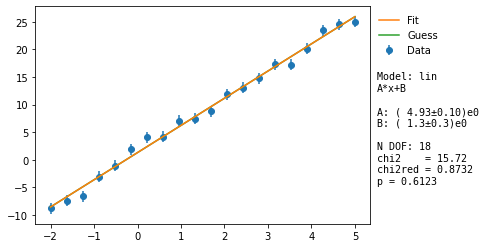

In [28]:
fit_lin = lazyfit.fit('lin', x, y_noise, dy=1)
fit_lin.plot(N=200, plot_guess = True);

# Logistic rise

In [29]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x0 = 0
k = 1

# generate test data
x = np.linspace(-10, 10, 30)
y = lazyfit.models.logistic.f(x, A, B, x0, k)
y_noise = np.random.poisson(lam=y)

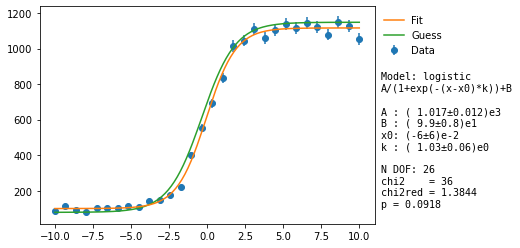

In [30]:
fit_logistic = lazyfit.fit('logistic', x, y_noise, dy=np.sqrt(y_noise))
fit_logistic.plot(N=200, plot_guess = True);

# Logistic pulse

In [31]:
# test data parameters
A = 1000 # amplitude
B = 100 # background
x0 = -2 # turn on time
x1 = 2 # turn off time
k0 = 2 # rising rate
k1 = 5 # falling rate

# generate test data
x = np.linspace(-10, 10, 30)
y = lazyfit.models.logpulse.f(x, A, B, x0, x1, k0, k1)
y_noise = np.random.poisson(lam=y)

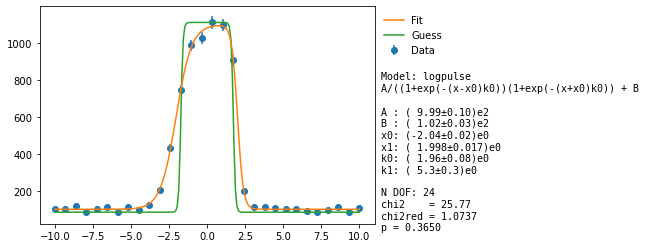

In [32]:
fit_logpulse = lazyfit.fit('logpulse', x, y_noise, dy=np.sqrt(y_noise))
fit_logpulse.plot(N=200, plot_guess = True);

# Dual gauss

This model uses the sum of two independent Gaussians to fit two peaks. The automatic guess estimation works by finding the largest peak, subtracting this from the data, and looking for a second peak. This works reasonable well as long as the data is not too noisy and the peaks dont overlap to much

In [43]:
# parameters of first peak
A1 = 100 # amplitude 
x1 = -1 # location
s1 = 0.3 # standard deviation

# parameters of first peak
A2 = 50 # amplitude 
x2 = 1 # location
s2 = 0.5 # standard deviation

B = 20 # background

# generate data
x = np.linspace(-10, 10, 200)
y = lazyfit.models.dualgaussian.f(x,A1,x1,s1,A2,x2,s2,B)
y_noise = np.random.poisson(lam=y)

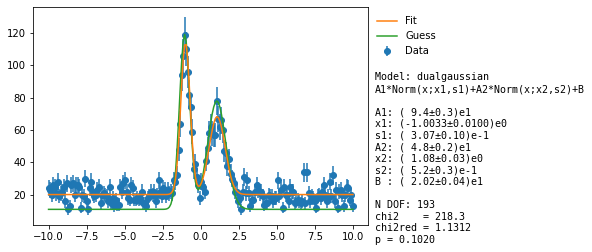

In [44]:
# fit
fit_dualgauss = lazyfit.fit('dualgaussian', x, y_noise, dy=np.sqrt(y_noise))
fit_dualgauss.plot(N=200, plot_guess = True);